In [ ]:
%load_ext rpy2.ipython

###**Regressão Logística**

#**Previsão e Detecção de Risco de Crédito**

In [ ]:
Problemas com a acentuação:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

## Instalando os pacotes

In [ ]:
%%R
install.packages("caret") # Criar modelos de Machine Learning em R
install.packages("ROCR")  # Criar Curva de avaliação da performance do Modelo
install.packages("e1071") # Funções e algoritmos 
library(caret)
library(ROCR)
library(e1071)

## Carregando o dataset em um DataFrame


In [5]:
%%R
credito_dataset <- read.csv("credit_dataset_final.csv", # nome do arquivo 
                            header = TRUE, # habilitar cabeçalho
                            sep = ",") # separador do arquivo entre ","
head(credito_dataset)

  credit.rating account.balance credit.duration.months
1             1               1                     18
2             1               1                      9
3             1               2                     12
4             1               1                     12
5             1               1                     12
6             1               1                     10
  previous.credit.payment.status credit.purpose credit.amount savings
1                              3              2          1049       1
2                              3              4          2799       1
3                              2              4           841       2
4                              3              4          2122       1
5                              3              4          2171       1
6                              3              4          2241       1
  employment.duration installment.rate marital.status guarantor
1                   1                4              1        

In [6]:
%%R
summary(credito_dataset) # Resumo estatístico de cada uma das variávies

 credit.rating account.balance credit.duration.months
 Min.   :0.0   Min.   :1.000   Min.   : 4.0          
 1st Qu.:0.0   1st Qu.:1.000   1st Qu.:12.0          
 Median :1.0   Median :2.000   Median :18.0          
 Mean   :0.7   Mean   :2.183   Mean   :20.9          
 3rd Qu.:1.0   3rd Qu.:3.000   3rd Qu.:24.0          
 Max.   :1.0   Max.   :3.000   Max.   :72.0          
 previous.credit.payment.status credit.purpose  credit.amount      savings     
 Min.   :1.000                  Min.   :1.000   Min.   :  250   Min.   :1.000  
 1st Qu.:2.000                  1st Qu.:2.000   1st Qu.: 1366   1st Qu.:1.000  
 Median :2.000                  Median :3.000   Median : 2320   Median :1.000  
 Mean   :2.292                  Mean   :2.965   Mean   : 3271   Mean   :1.874  
 3rd Qu.:3.000                  3rd Qu.:4.000   3rd Qu.: 3972   3rd Qu.:3.000  
 Max.   :3.000                  Max.   :4.000   Max.   :18424   Max.   :4.000  
 employment.duration installment.rate marital.status    guaran

In [7]:
%%R
str(credito_dataset) # Tipo das variáveis

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits

Primeiro coluna **credit.rating** (1/0) é o que desejamos prever para esta análise

In [ ]:
%%R
#View(credito_dataset)

---

Tanto Regressão Logística como Regressão Linear requerem que as variáveis numéricas estejam na mesma **escala**


- O que for categoria **transforma em fator**
- O que for número **transforma em escala**

##Pré-processamento

In [12]:
%%R
# Transformando variáveis categóricas em fatores
to.factors <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

##Normalização


In [13]:
%%R
# O que for variável numérica aplicamo a escala
scale.features <- function(df,         #recebe dataframe como entrada
                           variables){ #recebe lista de variáveis
  for (variable in variables){         #repetição
    df[[variable]] <- scale(df[[variable]], center = T, scale = T) #função scale p/mudar a escala da variável, centralizar(padronizar variáveis que forem numéricas)
  }
  return(df)
}

##Normalização

Normalizando variáveis numéricas

In [14]:
%%R
# Criando vetor com as variáveis que são numéricas - lista com o nome das variáveis numéricas
numeric.vars <- c("credit.duration.months", "age", "credit.amount")

# Aplicar a função scale.features ao dataset original
credito_dataset_scaled <- scale.features(credito_dataset, 
                                         numeric.vars) # aplicando às variáveis numéricas especificadas acima

Fatorando variáveis categóricas

In [15]:
%%R
# Variáveis do tipo fator - Criando lista de variáveis categóricas
categorical.vars <- c('credit.rating', 'account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation', 
                      'dependents', 'telephone', 'foreign.worker')

##Aplicando as conversões ao dataset - to.factors()

In [16]:
%%R
# Aplicando as conversões ao dataset com to.factors, passando: credito_dataset_scalled e categorical.vars como parâmetros
credito_dataset_final <- to.factors(df = credito_dataset_scaled, variables = categorical.vars)
head(credito_dataset_final)

  credit.rating account.balance credit.duration.months
1             1               1             -0.2407368
2             1               1             -0.9870788
3             1               2             -0.7382981
4             1               1             -0.7382981
5             1               1             -0.7382981
6             1               1             -0.9041519
  previous.credit.payment.status credit.purpose credit.amount savings
1                              3              2    -0.7872630       1
2                              3              4    -0.1673006       1
3                              2              4    -0.8609500       2
4                              3              4    -0.4071375       1
5                              3              4    -0.3897785       1
6                              3              4    -0.3649800       1
  employment.duration installment.rate marital.status guarantor
1                   1                4              1        

In [18]:
%%R
str(credito_dataset_final)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : num [1:1000, 1] -0.241 -0.987 -0.738 -0.738 -0.738 ...
  ..- attr(*, "scaled:center")= num 20.9
  ..- attr(*, "scaled:scale")= num 12.1
 $ previous.credit.payment.status: Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : Factor w/ 4 levels "1","2","3","4": 2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : num [1:1000, 1] -0.787 -0.167 -0.861 -0.407 -0.39 ...
  ..- attr(*, "scaled:center")= num 3271
  ..- attr(*, "scaled:scale")= num 2823
 $ savings                       : Factor w/ 4 levels "1","2","3","4": 1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : Factor w/ 4 levels "1","2","3","4": 1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : Factor w/ 4 levels "1","2","

In [ ]:
%%R
#View(credito_dataset_final)

##Dividindo dados de Treino e dados Teste

In [19]:
%%R
# Preparando os dados de treino e de teste
indexes <- sample(1:nrow(credito_dataset_final), # contar um número de linhas e extrair uma amostra com 0.6 p/ Dados Treino de tamanho do credito_dataset_final
                  size = 0.6 * nrow(credito_dataset_final))

train.data <- credito_dataset_final[indexes,] # Dados Treino - retornar todas as linhas que tenham valor de índice = objeto "indexes", todas as colunas
test.data <- credito_dataset_final[-indexes,] # Dados Teste  - retornar tudo que não tenha/seja "indexes" 

In [28]:
%%R 
str(train.data)

'data.frame':	600 obs. of  21 variables:
 $ credit.rating                 : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 2 2 ...
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 3 1 3 2 2 1 2 3 3 ...
 $ credit.duration.months        : num [1:600, 1] 1.252 -0.904 -1.236 -1.153 0.754 ...
 $ previous.credit.payment.status: Factor w/ 3 levels "1","2","3": 2 3 1 3 2 2 2 2 2 1 ...
 $ credit.purpose                : Factor w/ 4 levels "1","2","3","4": 4 4 3 3 2 3 3 3 3 2 ...
 $ credit.amount                 : num [1:600, 1] 2.125 -0.723 -0.734 -0.859 0.199 ...
 $ savings                       : Factor w/ 4 levels "1","2","3","4": 1 1 1 4 1 1 1 3 1 1 ...
 $ employment.duration           : Factor w/ 4 levels "1","2","3","4": 3 4 4 4 1 2 2 2 1 4 ...
 $ installment.rate              : Factor w/ 4 levels "1","2","3","4": 2 3 4 3 2 2 2 4 1 2 ...
 $ marital.status                : Factor w/ 3 levels "1","3","4": 2 2 1 2 3 2 1 1 1 2 ...
 $ guarantor                     : Factor w/ 

In [29]:
%%R
str(test.data)

'data.frame':	400 obs. of  21 variables:
 $ credit.rating                 : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 2 1 1 1 2 2 1 3 1 ...
 $ credit.duration.months        : num [1:400, 1] -1.07 0.257 0.754 -0.241 -1.236 ...
 $ previous.credit.payment.status: Factor w/ 3 levels "1","2","3": 3 2 3 2 2 2 3 3 3 2 ...
 $ credit.purpose                : Factor w/ 4 levels "1","2","3","4": 4 3 1 3 3 3 4 4 3 4 ...
 $ credit.amount                 : num [1:400, 1] 0.0449 0.1724 1.0329 -0.473 -0.2211 ...
 $ savings                       : Factor w/ 4 levels "1","2","3","4": 1 3 2 4 3 3 1 4 1 1 ...
 $ employment.duration           : Factor w/ 4 levels "1","2","3","4": 3 1 3 3 2 1 1 1 4 1 ...
 $ installment.rate              : Factor w/ 4 levels "1","2","3","4": 1 1 1 2 2 1 1 1 4 2 ...
 $ marital.status                : Factor w/ 3 levels "1","3","4": 2 1 3 3 2 3 2 2 2 2 ...
 $ guarantor                     : Factor w

##Separando os atributos e as classes - Separar variáveis explanatórias de variável alvo


In [32]:
%%R
test.feature.vars <- test.data[,-1] # Variável Explanatória: Retornar todas as linhas e todas as colunas exceto a primeira
test.class.var <- test.data[,1]     # Variável Resposta:     Retornar todas as linhas e apenas a primeira coluna


In [34]:
%%R
str(test.feature.vars)

'data.frame':	400 obs. of  20 variables:
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 2 1 1 1 2 2 1 3 1 ...
 $ credit.duration.months        : num [1:400, 1] -1.07 0.257 0.754 -0.241 -1.236 ...
 $ previous.credit.payment.status: Factor w/ 3 levels "1","2","3": 3 2 3 2 2 2 3 3 3 2 ...
 $ credit.purpose                : Factor w/ 4 levels "1","2","3","4": 4 3 1 3 3 3 4 4 3 4 ...
 $ credit.amount                 : num [1:400, 1] 0.0449 0.1724 1.0329 -0.473 -0.2211 ...
 $ savings                       : Factor w/ 4 levels "1","2","3","4": 1 3 2 4 3 3 1 4 1 1 ...
 $ employment.duration           : Factor w/ 4 levels "1","2","3","4": 3 1 3 3 2 1 1 1 4 1 ...
 $ installment.rate              : Factor w/ 4 levels "1","2","3","4": 1 1 1 2 2 1 1 1 4 2 ...
 $ marital.status                : Factor w/ 3 levels "1","3","4": 2 1 3 3 2 3 2 2 2 2 ...
 $ guarantor                     : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : Factor w

In [35]:
%%R 
str(test.class.var) # Resposta

 Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


---

##Construindo Modelo de Regressão Logística


In [36]:
%%R
formula.init <- "credit.rating ~ ."       # criar uma string de fórmula : resposta ~ demais variáveis explanatórias
formula.init <- as.formula(formula.init)  # definir como fórmula o parâmetro string formula.init

## Criar o modelo de Regressão Logística

In [37]:
%%R
# help(glm)
modelo_v1 <- glm(formula = formula.init, # passar a formula definida como parâmetro
                 data = train.data,      # indicar os dados de treino 
                 family = "binomial")    # indicar a família, na prática é uma classificação binária 1/0

##Visualizando os detalhes do modelo

In [38]:
%%R
summary(modelo_v1) # summary retorna o resumo total do modelo

# primeiro temos o intercepto
# posteriormente o nome de cada variável que são so demais coeficientes
# temos o valor estimado, o Erro Padrão, valor-z e valor-p
# de acordo com valor-p conseguimos identificar se a variável ajuda ou não a explicar a variabilidade de variável resposta
# os asteriscos indicam o quão relevante ou significante cada variável é p/ o modelo


Call:
glm(formula = formula.init, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4918  -0.6999   0.3708   0.7196   2.4332  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.9040     1.0037  -0.901 0.367778    
account.balance2                  0.5468     0.2837   1.927 0.053944 .  
account.balance3                  1.7089     0.2811   6.079 1.21e-09 ***
credit.duration.months           -0.2987     0.1435  -2.082 0.037323 *  
previous.credit.payment.status2   0.6284     0.4140   1.518 0.129038    
previous.credit.payment.status3   1.5279     0.4332   3.527 0.000421 ***
credit.purpose2                  -0.3859     0.4855  -0.795 0.426713    
credit.purpose3                  -0.8470     0.4613  -1.836 0.066358 .  
credit.purpose4                  -1.2487     0.4459  -2.800 0.005103 ** 
credit.amount                    -0.3621     0.1658  -2.184 0.0289

## Fazendo previsões e analisando o resultado com Dados de Teste


In [ ]:
# View(test.data)

Nos Dados de Teste nós temos a variável resposta, visto que queremos comparar o resultado do modelo. Queremos comparar as previsões em teste com os valores observados p/ calcular a taxa de erros e avaliar a performance do modelo. 

Por isso temos a variável resposta também nos dados de teste.

In [41]:
%%R
previsoes <- predict(modelo_v1, # Chamar a função predict e passar o modelo como parâmetro
                     test.data, # Passar os Dados de Teste
                     type = "response") # Ajustar como "response", a variável resposta que é o que desejamos com resultado

previsoes <- round(previsoes)  
#View(previsoes)

Quando as previsões são criadas, os valores são retornados como probabilidade. Se quisermos o retorno como (0/1) aplicamos o **round()**

In [43]:
%%R
print(previsoes)

   7   10   12   15   16   18   22   25   31   35   37   42   43   45   46   48 
   1    0    1    1    1    1    1    1    1    1    1    0    1    1    0    1 
  49   52   55   56   65   68   70   77   80   82   85   87   97  106  107  113 
   1    1    1    1    0    1    1    1    1    1    1    1    1    1    1    1 
 116  117  120  121  123  125  127  129  131  134  135  138  143  144  145  146 
   0    1    1    0    0    1    1    1    1    1    1    1    1    1    1    1 
 147  151  154  156  157  158  159  161  163  168  170  172  174  175  179  183 
   1    1    1    1    0    1    0    1    1    1    1    0    1    1    1    0 
 184  186  190  192  202  205  206  210  215  217  218  219  221  224  225  226 
   1    1    1    1    1    1    1    1    1    1    1    0    0    1    1    1 
 229  231  233  238  242  247  251  252  255  258  259  262  265  268  273  274 
   1    1    1    0    0    1    1    1    1    1    1    1    1    1    1    1 
 279  282  283  284  285  28

##Confusion Matrix - Automatizar o processo de comparação

Mostra o nível de performance alcançado pelo modelo

In [45]:
%%R
confusionMatrix(table(data = previsoes, # previsões que foram calculadas logo antes pelo modelo
                      reference = test.class.var),  # utilizar a classe de teste como valores observados
                      positive = '1')

# Os dados tinham como label o valor 0 e o modelo previu 0 - 59 vezes ~ modelo acertou
# Os dados tinham como label o valor 0 e o modelo previu 1 - 43 vezes ~ modelo errou
# Os dados tinham como label o valor 1 e o modelo previu 0 - 61 vezes ~ modelo errou
# Os dados tinham como label o valor 1 e o modelo previu 1 - 238 vezes ~ modelo acertou

# A acurácia deste modelo está em 74% para este conjunto de dados

Confusion Matrix and Statistics

    reference
data   0   1
   0  58  43
   1  61 238
                                          
               Accuracy : 0.74            
                 95% CI : (0.6941, 0.7823)
    No Information Rate : 0.7025          
    P-Value [Acc > NIR] : 0.05501         
                                          
                  Kappa : 0.3496          
                                          
 Mcnemar's Test P-Value : 0.09552         
                                          
            Sensitivity : 0.8470          
            Specificity : 0.4874          
         Pos Pred Value : 0.7960          
         Neg Pred Value : 0.5743          
             Prevalence : 0.7025          
         Detection Rate : 0.5950          
   Detection Prevalence : 0.7475          
      Balanced Accuracy : 0.6672          
                                          
       'Positive' Class : 1               
                                          


Dificilmente a 1a versão do modelo será a ideal

## Feature Selection - Idenfiticar as variáveis mais relevantes 

Será que precisamos de todas as variáveis explanatória para criar o modelo de regressão logística?

In [46]:
%%R

formula <- "credit.rating ~ ." # Primeiro vamos criar uma fórmula utilizando y e todas as demais variáveis explanatórias

formula <- as.formula(formula) # Converter em fórmular

control <- trainControl(method = "repeatedcv", number = 10, repeats = 2) # função trainControl() {caret}
# A função criará um método p/ o modelo ser repetido diversas vezes, inclusive utilizando cross validation
# Repetiremos o processo inúmeras vezes e ao final seremos capazes de extrair as variáveis mais relevantes

model <- train(formula, # função  train() {caret}, passando a fórmula como parâmetro
               data = train.data, # repassando os dados de TREINO
               method = "glm",    # método glm para Regressão Logística
               trControl = control) # qual será o procedimento de controle

# Uma vez com o modelo acima executado, podemos aplicar a função VarImp p/ extrair a importância das variáveis
# varImp coletará a importância de cada uma das variáveis
importance <- varImp(model, # passar o modelo
                     scale = FALSE) 

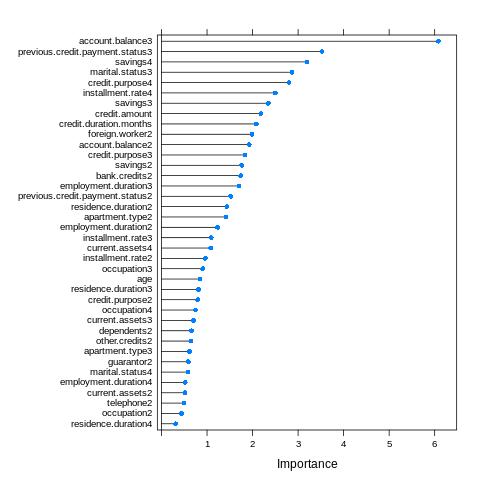

In [47]:
%%R
plot(importance)

##Construindo um novo modelo com as variáveis selecionadas

In [49]:
%%R
# colocar na nova fórmula apenas as principais variáveis retornadas por varImp
formula.new <- "credit.rating ~ account.balance + credit.purpose + previous.credit.payment.status + savings + credit.duration.months"
formula.new <- as.formula(formula.new) # aplicamos à função fórmula

modelo_v2 <- glm(formula = formula.new, # Criando a segunda versão do modelo
                 data = train.data,     # Dados de Treino
                 family = "binomial")   # Classificação binária para Regressão Logística

##Visualizando novo modelo

In [50]:
%%R
summary(modelo_v2)


Call:
glm(formula = formula.new, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5662  -0.8389   0.4508   0.7357   1.8526  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.6605     0.5008  -1.319  0.18722    
account.balance2                  0.5406     0.2541   2.128  0.03335 *  
account.balance3                  1.6651     0.2608   6.385 1.71e-10 ***
credit.purpose2                  -0.2246     0.4366  -0.514  0.60693    
credit.purpose3                  -0.6162     0.4024  -1.531  0.12570    
credit.purpose4                  -0.9632     0.3987  -2.416  0.01571 *  
previous.credit.payment.status2   0.8632     0.3595   2.401  0.01634 *  
previous.credit.payment.status3   1.4777     0.3714   3.979 6.93e-05 ***
savings2                          0.6331     0.3572   1.772  0.07632 .  
savings3                          1.1523     0.4186   2.753  0.0059

##Prevendo e Avaliando o Modelo 

In [75]:
%%R
previsoes_new <- predict(modelo_v2, test.data, type = "response") 
previsoes_new <- round(previsoes_new)

##Confusion Matrix - Avaliar perfomance do modelo após a construção de cada versão



Tecnicamente temos quase a mesma Acurácia do primeiro modelo 

O fato de termos uma acurácia menor, não significa que seja um problema. Talvez a verão 1 do modelo com acurácia um pouco maior fosse um modelo mais tendencioso. 

Essa nova versão tem menos variáveis, portanto é um modelo menos complexo que, talvez, seja mais generalizável. 


In [52]:
%%R
confusionMatrix(table(data = previsoes_new, reference = test.class.var), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0  50  37
   1  69 244
                                          
               Accuracy : 0.735           
                 95% CI : (0.6889, 0.7776)
    No Information Rate : 0.7025          
    P-Value [Acc > NIR] : 0.084705        
                                          
                  Kappa : 0.3127          
                                          
 Mcnemar's Test P-Value : 0.002604        
                                          
            Sensitivity : 0.8683          
            Specificity : 0.4202          
         Pos Pred Value : 0.7796          
         Neg Pred Value : 0.5747          
             Prevalence : 0.7025          
         Detection Rate : 0.6100          
   Detection Prevalence : 0.7825          
      Balanced Accuracy : 0.6442          
                                          
       'Positive' Class : 1               
                                          


---

Quando chegarmos numa versão que seja próxima do que considerarmos ideal, podemos fazer a avaliação de performance do modelo usando, por exemplo, uma curva ROC. 

A curva ROC ajuda a compreender de maneira mais visual se o modelo tem ou não uma boa performance. 

##Avaliando Performance do Modelo - c/ Dados de Teste

### Plot do modelo com melhor Acurácia

In [53]:
%%R
modelo_final <- modelo_v2 # determinamos que este será o modelo final 

previsoes <- predict(modelo_final,  # função predict() com o modelo final
                     test.feature.vars, # atributos nos Dados de Teste (novos dados)
                     type = "response")  # queremos a variável resposta

# agora temos a avaliação, a diferença entre as previsões do modelo e os valores observados em Teste
# prediction() faz exatamente esse cálculo da diferença do previsto e observado
avaliacao <- prediction(previsoes, 
                               test.class.var)

## Função Plot ROC

In [54]:
%%R
# Função para Plot ROC 
plot.roc.curve <- function(predictions, title.text){
  perf <- performance(avaliacao, "tpr", "fpr")
  plot(perf,col = "black",lty = 1, lwd = 2,
       main = title.text, cex.main = 0.6, cex.lab = 0.8,xaxs = "i", yaxs = "i")
  abline(0,1, col = "red")
  auc <- performance(avaliacao, "auc")
  auc <- unlist(slot(auc, "y.values"))
  auc <- round(auc,2)
  legend(0.4,0.4,legend = c(paste0("AUC: ",auc)), cex = 0.6, bty = "n", box.col = "white")  
}

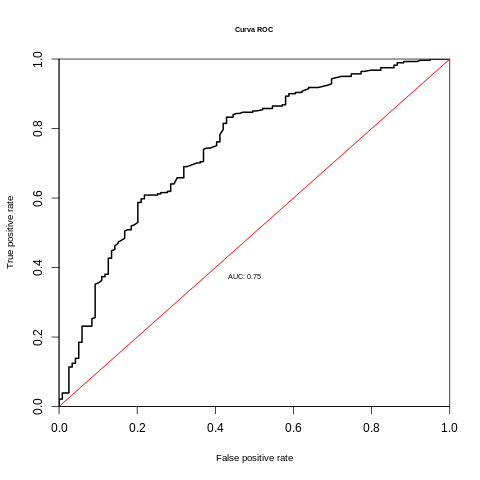

In [60]:
%%R
# Plot
par(mfrow = c(1, 1)) # definir área de plotagem

# executar a função roc
plot.roc.curve(avaliacao, title.text = "Curva ROC")

# Primeiramente temos a relação entre a taxa de falso positivo no eixo X
# Taxa de verdadeiro positivo no eixo Y
# A linha vermelha é uma linha de corte que representa 50% de precisão 
# Se a linha ROC estive abaixo da linha vermelha, o modelo é horrível
# A meta é manter ROCa acima da linha vermelha e mais próximo possível de 1.0, próximo a 100%

# ROC é uma maneira visual de avaliar a performance do modelo
# Excelente forma de documentar nosso trabalho, de forma visual

---

##Fazendo previsões em novos dados

### Novos dados

Primeiro coletamos os dados, realizamos o pré-processamento, dividimos em dados de Treino e Teste. Dados de treino treinamos o modelo, dados de teste p/ avaliar a perfomance do modelo. 

Uma vez alcançada a performance ideal esperada, podemos colocá-lo p/ trabalhar. A partir desse modelo acaba o trablaho do cientista de dados. 

Neste momento inicia o trabalho do engenheiro de Machine Learning ou do engenheiro de dados. Não cabe ao cientista de dados colocar o modelo p/ fazer previsões. 

In [88]:
%%R
# O modelo agora precisa receber dados de novos/futuros clientes
# Temos as 5 variáveis explanatórias usadas p/ treinar e criar o modelo


# Temos agora dados de 3 novos clientes, as informações dos clientes estão alocadas nos vetores
account.balance <- c(1, 3, 3, 2)

credit.purpose <- c(4, 2, 3, 2)

previous.credit.payment.status <- c(3, 3, 2, 2)

savings <- c(2, 3, 2, 3)

credit.duration.months <- c(15, 12, 8, 6)

##Criar DataFrame com os vetores dos novos clientes

O modelo recebe o objeto DataFrame p/ rodar

In [89]:
%%R
novo_dataset <- data.frame(account.balance, 
                           credit.purpose, 
                           previous.credit.payment.status, 
                           savings, 
                          credit.duration.months)

head(novo_dataset)

  account.balance credit.purpose previous.credit.payment.status savings
1               1              4                              3       2
2               3              2                              3       3
3               3              3                              2       2
4               2              2                              2       3
  credit.duration.months
1                     15
2                     12
3                      8
4                      6


In [79]:
%%R
class(novo_dataset)

[1] "data.frame"


In [80]:
%%R
#View(novo_dataset)

NULL


##Pré-processamento é necessário também p/ novas previsões

## Separar variáveis explanatórias numéricas e categóricas

In [90]:
%%R
# variável numérica
new.numeric.vars <- c("credit.duration.months") 

# variáveis categóricas
new.categorical.vars <- c('account.balance', 'previous.credit.payment.status', 
                          'credit.purpose', 'savings')

## Aplicando transformações![texto alternativo](https://)

In [91]:
%%R
# transformar variáveis categóricas em fator 
novo_dataset_final <- to.factors(df = novo_dataset, variables = new.categorical.vars)
str(novo_dataset_final)

'data.frame':	4 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 3 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2 1
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1 2
 $ credit.duration.months        : num  15 12 8 6


In [92]:
%%R
# transformar variáveis numéricas em escala
novo_dataset_final <- scale.features(novo_dataset_final, new.numeric.vars)
str(novo_dataset_final)

'data.frame':	4 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","2","3": 1 3 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2 1
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1 2
 $ credit.duration.months        : num [1:4, 1] 1.178 0.434 -0.558 -1.054
  ..- attr(*, "scaled:center")= num 10.2
  ..- attr(*, "scaled:scale")= num 4.03


In [ ]:
%%R
#View(novo_dataset_final)

In [93]:
%%R
head(novo_dataset_final)
# valores negativos não têm problema, é puramente uma escala

  account.balance credit.purpose previous.credit.payment.status savings
1               1              4                              3       2
2               3              2                              3       3
3               3              3                              2       2
4               2              2                              2       3
  credit.duration.months
1              1.1783300
2              0.4341216
3             -0.5581563
4             -1.0542952


##Previsões

In [96]:
%%R
previsoes_novo_cliente <- predict(modelo_final, newdata = novo_dataset_final, type = "response")
round(previsoes_novo_cliente)

1 2 3 4 
0 1 1 1 


O cliente 1, não pode receber Crédito, já os demais passaram na análise.